## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [30]:
import os
import keras

# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [31]:
train, test = keras.datasets.cifar10.load_data()

In [32]:
## 資料前處理

def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [33]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [36]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [37]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [38]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 485us/step - loss: 1.6924 - acc: 0.3960 - val_loss: 1.5383 - val_acc: 0.4516
Epoch 2/100
50000/50000 [==============================] - 22s 436us/step - loss: 1.4697 - acc: 0.4803 - val_loss: 1.4396 - val_acc: 0.4969
Epoch 3/100
50000/50000 [==============================] - 22s 448us/step - loss: 1.3454 - acc: 0.5257 - val_loss: 1.4022 - val_acc: 0.5020
Epoch 4/100
50000/50000 [==============================] - 23s 451us/step - loss: 1.2487 - acc: 0.5618 - val_loss: 1.3861 - val_acc: 0.5173
Epoch 5/100
50000/50000 [==============================] - 25s 500us/step - loss: 1.1692 - acc: 0.5869 - val_loss: 1.3833 - val_acc: 0.5188
Epoch 6/100
50000/50000 [==============================] - 22s 450us/step - loss: 1.0943 - acc: 0.6119 - val_loss: 1.3463 - val_acc: 0.5330
Epoch 7/100
50000/50000 [==============================] - 23s

50000/50000 [==============================] - 24s 474us/step - loss: 0.1021 - acc: 0.9661 - val_loss: 3.6491 - val_acc: 0.5218
Epoch 58/100
50000/50000 [==============================] - 21s 426us/step - loss: 0.0934 - acc: 0.9684 - val_loss: 3.7354 - val_acc: 0.5203
Epoch 59/100
50000/50000 [==============================] - 21s 428us/step - loss: 0.1048 - acc: 0.9658 - val_loss: 3.7333 - val_acc: 0.5280
Epoch 60/100
50000/50000 [==============================] - 21s 425us/step - loss: 0.1124 - acc: 0.9631 - val_loss: 3.6129 - val_acc: 0.5290
Epoch 61/100
50000/50000 [==============================] - 21s 426us/step - loss: 0.1055 - acc: 0.9652 - val_loss: 3.6523 - val_acc: 0.5266
Epoch 62/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.1009 - acc: 0.9671 - val_loss: 3.7643 - val_acc: 0.5272
Epoch 63/100
50000/50000 [==============================] - 21s 429us/step - loss: 0.0917 - acc: 0.9691 - val_loss: 3.7322 - val_acc: 0.5277
Epoch 64/100
50000/50000 [

In [40]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]



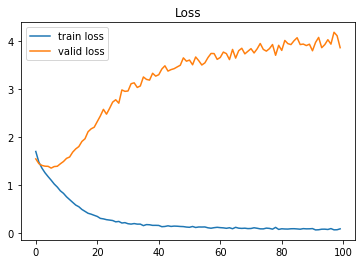

In [41]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

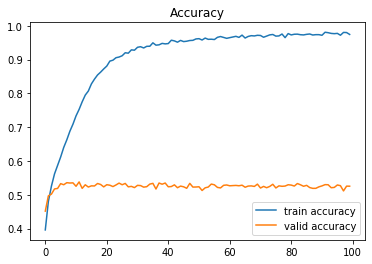

In [42]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()